<a href="https://colab.research.google.com/github/adnlab/Mini_Project_Data/blob/main/Dicoding_NLP_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri

Adnan Muhammad Lazuardi

adnanm.lazuardi@gmail.com

Sumber dataset:

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

dataset yang diperoleh digabungkan kedalam satu dokumen dengan nama emotion.**txt**

In [ ]:
import pandas as pd
df = pd.read_csv('emotion.txt', names=['sentence', 'emotion'], sep=';')

In [ ]:
df.head()

,sentence,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  20000 non-null  object
 1   emotion   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
category = pd.get_dummies(df.emotion)
dfn = pd.concat([df, category], axis=1)
dfn = dfn.drop(columns='emotion')
dfn

,sentence,anger,fear,joy,love,sadness,surprise
0,im feeling rather rotten so im not very ambiti...,0,0,0,0,1,0
1,im updating my blog because i feel shitty,0,0,0,0,1,0
2,i never make her separate from me because i do...,0,0,0,0,1,0
3,i left with my bouquet of red and yellow tulip...,0,0,1,0,0,0
4,i was feeling a little vain when i did this one,0,0,0,0,1,0
...,...,...,...,...,...,...,...
19995,im having ssa examination tomorrow in the morn...,0,0,0,0,1,0
19996,i constantly worry about their fight against n...,0,0,1,0,0,0
19997,i feel its important to share this info for th...,0,0,1,0,0,0
19998,i truly feel that if you are passionate enough...,0,0,1,0,0,0


In [ ]:
text = dfn['sentence'].values
emotion = dfn[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [ ]:
from sklearn.model_selection import train_test_split
txt_train, txt_test, e_train, e_test = train_test_split(text, emotion, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(txt_train) 
tokenizer.fit_on_texts(txt_test)
 
sq_train = tokenizer.texts_to_sequences(txt_train)
sq_test = tokenizer.texts_to_sequences(txt_test)
 
padded_train = pad_sequences(sq_train) 
padded_test = pad_sequences(sq_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [ ]:
num_epochs = 30
history = model.fit(padded_train, e_train, epochs=num_epochs, 
                    validation_data=(padded_test, e_test), verbose=2, callbacks=[early])

Epoch 1/30
500/500 - 35s - loss: 1.4632 - accuracy: 0.3557 - val_loss: 1.2382 - val_accuracy: 0.4230 - 35s/epoch - 70ms/step
Epoch 2/30
500/500 - 18s - loss: 1.0932 - accuracy: 0.4835 - val_loss: 0.9630 - val_accuracy: 0.6112 - 18s/epoch - 36ms/step
Epoch 3/30
500/500 - 17s - loss: 0.7603 - accuracy: 0.6940 - val_loss: 0.6826 - val_accuracy: 0.7297 - 17s/epoch - 34ms/step
Epoch 4/30
500/500 - 17s - loss: 0.5887 - accuracy: 0.7664 - val_loss: 0.5763 - val_accuracy: 0.7785 - 17s/epoch - 34ms/step
Epoch 5/30
500/500 - 26s - loss: 0.5002 - accuracy: 0.8026 - val_loss: 0.5481 - val_accuracy: 0.7987 - 26s/epoch - 53ms/step
Epoch 6/30
500/500 - 17s - loss: 0.4126 - accuracy: 0.8515 - val_loss: 0.4318 - val_accuracy: 0.8583 - 17s/epoch - 34ms/step
Epoch 7/30
500/500 - 19s - loss: 0.3321 - accuracy: 0.8847 - val_loss: 0.3894 - val_accuracy: 0.8723 - 19s/epoch - 39ms/step
Epoch 8/30
500/500 - 18s - loss: 0.2783 - accuracy: 0.9037 - val_loss: 0.3453 - val_accuracy: 0.8820 - 18s/epoch - 35ms/step


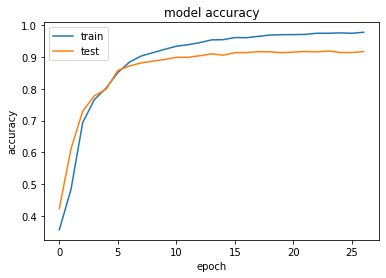

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

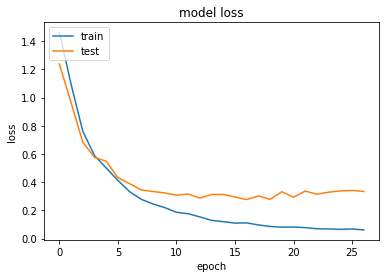

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy_score = model.evaluate(padded_test, e_test)
print(accuracy_score)

print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
print("Loss: ",accuracy_score[0])

125/125 [==============================] - 2s 12ms/step - loss: 0.2769 - accuracy: 0.9145
[0.2769295275211334, 0.9144999980926514]
Accuracy: 91.4500%
Loss:  0.2769295275211334
